In [1]:
import numpy as np
import pylab as plt
import networkx as nx

In [2]:
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

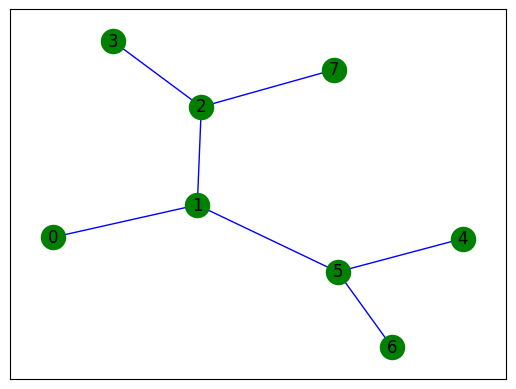

In [3]:
goal = 7
mapping = {0 : "Start", 1 : "1", 2 : "2", 3 : "3", 4 : "4", 5 : "5", 6 : "6", 7 : "7-Destination"}
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G, k = 0.5, center = points_list[2])
nx.draw_networkx_nodes(G, pos, node_color = "g")
nx.draw_networkx_edges(G, pos, edge_color = "b")
nx.draw_networkx_labels(G, pos)
plt.show()

In [4]:
NO_OF_POINTS = 8

In [5]:
R = np.matrix(np.ones(shape = (NO_OF_POINTS, NO_OF_POINTS)))
R *= -1

In [6]:
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 150
    else:
        R[point] = 0
    
    if point[0] == goal:
        R[point[::-1]] = 150
    else:
        R[point[::-1]] = 0

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [7]:
R[goal, goal] = 150

In [8]:
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 150.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 150.]])

In [9]:
Q = np.matrix(np.zeros([NO_OF_POINTS, NO_OF_POINTS]))

# The Learning Parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act, 1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):

    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print("max value", R[current_state, action] + gamma * max_value)

    if np.max(Q) > 0:
        return np.sum(Q / np.max(Q) * 100)
    else:
        return 0

update(initial_state, action, gamma)


max value 0.0


0

In [10]:
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state, action, gamma)
    scores.append(score)
    print("Score:", str(score))

print("Trained Q matrix:")
print(Q / np.max(Q) * 100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

max value 150.0
Score: 100.0
max value 0.0
Score: 100.0
max value 0.0
Score: 100.0
max value 0.0
Score: 100.0
max value 0.0
Score: 100.0
max value 0.0
Score: 100.0
max value 270.0
Score: 155.55555555555554
max value 0.0
Score: 155.55555555555554
max value 0.0
Score: 155.55555555555554
max value 0.0
Score: 155.55555555555554
max value 270.0
Score: 200.0
max value 0.0
Score: 200.0
max value 216.0
Score: 280.0
max value 216.0
Score: 280.0
max value 0.0
Score: 280.0
max value 0.0
Score: 280.0
max value 0.0
Score: 280.0
max value 0.0
Score: 280.0
max value 216.0
Score: 280.0
max value 0.0
Score: 280.0
max value 216.0
Score: 280.0
max value 216.0
Score: 280.0
max value 0.0
Score: 280.0
max value 0.0
Score: 280.0
max value 0.0
Score: 280.0
max value 0.0
Score: 280.0
max value 0.0
Score: 280.0
max value 0.0
Score: 280.0
max value 0.0
Score: 280.0
max value 216.0
Score: 360.0
max value 172.8
Score: 424.0
max value 0.0
Score: 424.0
max value 0.0
Score: 424.0
max value 0.0
Score: 424.0
max value 

Most efficient path:
[0, 1, 2, 7]


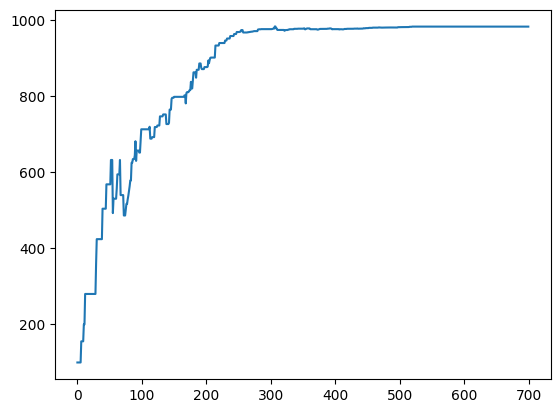

In [11]:
print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()